# Unsupervised Learning - Overview

In this exercise we will go over an example of unsupervised learning where we have some ground truth labels. Our goal will be to determine some clustering results using $k$Means on a simple dataset and evaluate them. 

You will:
1. Run KMeans on a simple dataset
1. Write a function to create a contingency table (see lecture if you don't recall what that is)
1. Evaluate clustering using a variety of methods when we have the ground truth results
1. Evaluate clustering when we act like we don't have ground truth

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline
plt.style.use("ggplot")

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, homogeneity_completeness_v_measure, silhouette_score

In [3]:
n = 10000
X, y = make_blobs(n_samples=n, centers=10, n_features=2, random_state=0)

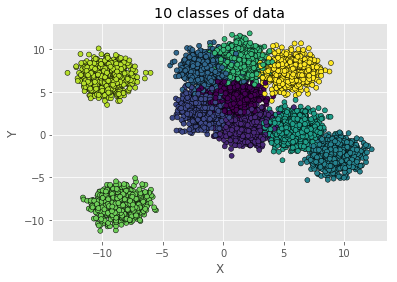

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.title("10 classes of data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Instead of performing classification on this problem, we can withhold the labels from our model and apply a clustering algorithm instead. Let's apply [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to this example and predict the clusters each point will belong to.

In [11]:
# Create a model named `model` using KMeans with k = 10
# Fit the model to the data
# Predict the classes of the data and save those as y_pred
# Note: You may use the fit_predict method to skip a step
# YOUR CODE HERE
model = sk.cluster.KMeans(n_clusters=10, random_state=0).fit(X)
y_pred = model.predict(X)

In [12]:
assert len(model.cluster_centers_) == 10
assert len(y_pred) == len(y)

We can access the learned cluster centroids using the `cluser_centers_` attribute of the trained model. Let's plot the centroids on top of our data.

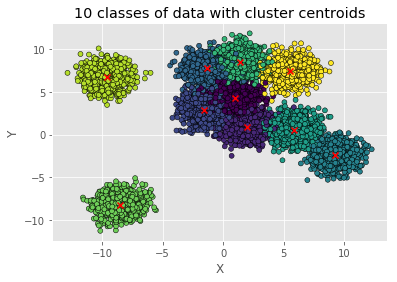

In [13]:
centroids = model.cluster_centers_
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=25, edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", c="r")
plt.title("10 classes of data with cluster centroids")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Try changing the data to have more blobs and repeat this experiment and see what happens. Note that you'll fail the assertions when you change the value of k so make sure to go back and fix that before submitting!

Now that we have our predictions, we can determine how well our model works using a variety of metrics for unsupervised learning. First, let's create the contingency table/matrix for our data. This is similar to a confusion matrix but the diagonal is irrelevant as the cluster names won't align with the original classes.

The following may be useful:

- Python Sets - [sets](https://docs.python.org/3.6/tutorial/datastructures.html)
- Creating a matrix with all zeros: [np.zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html)
- Boolean indexing with numpy: [indexing](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.indexing.html)
- Logic operations on numpy arrays: [logic operations](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.logic.html#logical-operations)

In [92]:
import inspect
def contingency_table(y_1, y_2):
    """Determine the contingency matrix based on two sets of element groupings
    
    Args:
        y_1 (iterable): A labeling of elements into clusters
        y_2 (iterable): Another labeling of elements into clusters
    
    Returns:
        np.ndarray: A matrix with shape n_groups_y1, n_groups_y2 listing the number of 
                    elements from one cluster in y1 that are also in one cluster in y2 
    """
    # YOUR CODE HERE
    n_groups_y1 = len(set(y_1))
    n_groups_y2 = len(set(y_2))
    table = np.zeros((n_groups_y1, n_groups_y2))
    
    for i in range(len(y_1)):
        table[y_1[i], y_2[i]] += 1        
    return table


In [93]:
test_cont = contingency_table(np.array([0,0,1,2,2]), np.array([1,1,1,0,2]))
assert test_cont.shape == (3,3)
assert np.all(test_cont.T == contingency_table(np.array([1,1,1,0,2]), np.array([0,0,1,2,2])))

This is a hint if you're struggling with defining the function for contingency tables. If you did fine, keep reading instead.


To build a contingency table,

1. Think about the dimensions of the resulting matrix
1. Instantiate a matrix
1. Loop over all values to determine where they should be counted.

In [94]:
contingency_table(y, y_pred)

array([[  36.,   14.,    0.,    0.,    0.,  864.,   14.,    2.,    0.,
          70.],
       [ 932.,    0.,    0.,    0.,   25.,   32.,    0.,    0.,    0.,
          11.],
       [  22.,    0.,    0.,    0.,    0.,   68.,    6.,    0.,    0.,
         904.],
       [   0.,   86.,    0.,    0.,    0.,   18.,  888.,    0.,    0.,
           8.],
       [   0.,    0.,    0.,    0.,   15.,    0.,    0.,    0.,  985.,
           0.],
       [  27.,    0.,    0.,    0.,  959.,    0.,    0.,    1.,   13.,
           0.],
       [   0.,  881.,    0.,    0.,    0.,   15.,   84.,   20.,    0.,
           0.],
       [   0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,   14.,    0.,    0.,    0.,    2.,    0.,  984.,    0.,
           0.]])

In [95]:
contingency_table(y, y)

array([[1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0., 1000.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1000.]])

In [96]:
contingency_table(y_pred, y_pred)

array([[1017.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,  995.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0., 1000.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,  999.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,  999.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,  992.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0., 1007.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,  998.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         993.]])

What do these tables tell you?

Let's examine our model's performance scores based on other metrics, namely:
1. [Adjusted Rand Index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)
1. [Adjusted Mutual Information](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_mutual_info_score.html#sklearn.metrics.adjusted_mutual_info_score)
1. [Homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html)
1. [Completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score)
1. [V-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score)
1. [Silhouette Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

The Adjusted Rand Index is a measure of similarity between two sets of labels that normalizes for randomness. Perfect labeling results in a score of 1 and poor labeling results in a negative or 0 score. 

In [97]:
print(f"Our model has an adjusted rand index of {adjusted_rand_score(y, y_pred):.4f}")

Our model has an adjusted rand index of 0.8760


Adjusted Mutual Information is another measure of consensus. It measures the agreement between two sets after normalizing for chance. Similar to ARI, perfect labeling gets a score of 1 and poor labeling results in a negative or 0 score.

In [98]:
print(f"Our model has an adjusted mutual information score of {adjusted_mutual_info_score(y, y_pred, average_method='arithmetic'):.4f}")

Our model has an adjusted mutual information score of 0.8901


 - Homogeneity is a measure of clusters containing only points from the same class
 - Completeness is a measure of clusters containing all points of a particular class
 - V-Measure is the hyperbolic mean of the two
 
 All 3 are bounded between 0 and 1 where 1 is a perfect score.

In [99]:
h,c,v = homogeneity_completeness_v_measure(y, y_pred)

print(f"Our model has a homogeneity score of {h:.4f}, completeness score of {c:.4f}, and a v-measure of {v:.4f}.")

Our model has a homogeneity score of 0.8903, completeness score of 0.8903, and a v-measure of 0.8903.


Try a different value of $k$ and see how these scores change!

Now let's use the silhoutte score and search for the best value of k for KMeans acting like we don't know the ground truth. We expect it to be 3 since we know that is the ground truth however that doesn't mean we are guaranteed the highest score at $k=3$. This is where we may uncover other patterns in the data that we are originally unaware of. We know that certain things can be classified a certain way but from a different perspective they may be classified into less or more things as well.

For the silhouette score, the values range from -1 to 1 where 0 indicates some overlapping clusters, 1 is the best value and -1 is the worst. 


In [105]:
def get_silhouette_ks(ks, features):
    """Get silhoutte scores of applying KMeans to a set of features with a variety of k values 
    
    Args:
        ks (iterable): List of k values to experiment with
        features (iterable): The features to train the model on
    
    Returns:
        iterable: A list of scores of models trained using each value of k
    """
    # YOUR CODE HERE
    myList = []
    for k in range(len(ks)):
        model = sk.cluster.KMeans(n_clusters=ks[k], random_state=0).fit(features)
        y_pred = model.predict(features)
        myList.append(sk.metrics.silhouette_score(features, y_pred))
    return myList
        

In [106]:
ks = [2,3,4,5,6,10,20,50, 100]
scores = get_silhouette_ks(ks, X)

In [108]:
assert len(scores) == len(ks)
assert scores[4] == max(scores)

In [109]:
maxScore = 0
bestK = ks[0]
for k, score in zip(ks, scores):
    if score > maxScore:
        bestK = k
        maxScore = score
    print(f"With k = {k}, the silhoute score is {score:.4f}")
    
print(f"\n\nThe best k value is k={bestK}, scoring {maxScore:.4f}.")

With k = 2, the silhoute score is 0.5343
With k = 3, the silhoute score is 0.4455
With k = 4, the silhoute score is 0.5405
With k = 5, the silhoute score is 0.5431
With k = 6, the silhoute score is 0.5715
With k = 10, the silhoute score is 0.5596
With k = 20, the silhoute score is 0.3198
With k = 50, the silhoute score is 0.3232
With k = 100, the silhoute score is 0.3275


The best k value is k=6, scoring 0.5715.


**Note the y axis values.**

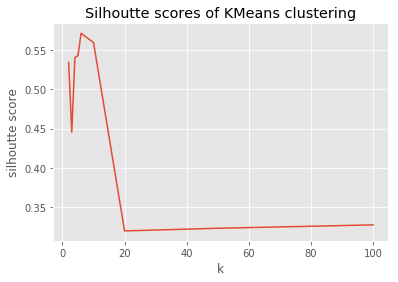

In [110]:
plt.plot(ks, scores)
plt.xlabel("k")
plt.ylabel("silhoutte score")
plt.title("Silhoutte scores of KMeans clustering")
plt.show()

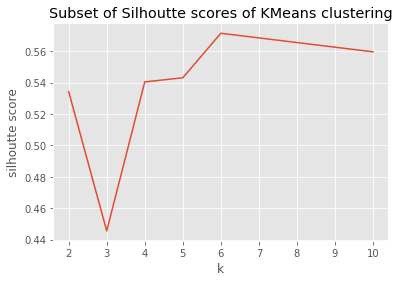

In [111]:
plt.plot(ks[:6], scores[:6])
plt.xlabel("k")
plt.ylabel("silhoutte score")
plt.title("Subset of Silhoutte scores of KMeans clustering")
plt.show()

Try changing the data to have more or less blobs and repeat this experiment and see what happens.

## Feedback

In [ ]:
def feedback():
    """Provide feedback on the contents of this exercise
    
    Returns:
        string
    """
    # YOUR CODE HERE
    return "Thank Saad for his assistance during class."